 ## Unicorn Companies Dataset

Unicorn companies are private startups valued at over $1 billion, and they represent some of the most exciting and innovative firms in the business world today. By studying these companies, we can gain insights into what it takes to achieve high growth potential, build a diversified investment portfolio, and prioritize experienced leadership teams. In this project, we'll be using Python to analyze data on unicorn companies from around the world. We'll explore trends in their funding, revenue, and valuation, and we'll use machine learning algorithms to identify key factors that contribute to their success.

## Problem Statement
In order to proffer solution to the problems below I WILL Explore every features in the dataset to come up with actionable observations and overall recommendations which will be of benefit to the Unicorn Companies; These problems include;

- Which unicorn companies have had the biggest return on investment?
- How long does it usually take for a company to become a unicorn? Has it always been this way?
- Which countries have the most unicorns? Are there any cities that appear to be industry hubs?
- Which investors have funded the most unicorns?


In [52]:
# Import Libraries requires for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

In [60]:
# import dataset for data
df = pd.read_csv(r'C:\Users\eolow\OneDrive - University of Reading\Desktop\Unicorn_Companies.csv')

In [61]:
#check the details(head) of the data set
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Otto Bock HealthCare,4.000000e+09,6/24/2017,Health,Duderstadt,Germany,Europe,1919.0,0.0,EQT Partners
1,Zapier,4.000000e+09,1/14/2021,Internet software & services,Sunnyvale,United States,North America,2011.0,1000000.0,"Sequoia Capital, Bessemer Venture Partners, Th..."
2,Workhuman,1.000000e+09,6/23/2020,Internet software & services,Dublin,Ireland,Europe,1999.0,9000000.0,ICG
3,Manner,1.000000e+09,12/24/2020,Other,Shanghai,China,Asia,2015.0,10000000.0,"Coatue Management, H Capital, Capital Today"
4,GalaxySpace,1.000000e+09,11/17/2020,Mobile & telecommunications,Beijing,China,Asia,2016.0,14000000.0,"Shunwei Capital Partners, 5Y Capital, Legend C..."


In [62]:
#check the details(tail) of the data set
df.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Wrangling

This is intended to dentify gaps or empty cells in the data and either fill or remove them. This also involves deleting irrelevant or unnecessary data

In [63]:
# Identify the number of rows and columns
df.shape

(1075, 10)

In [64]:
# Identify the details in the columns of the dataset
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [65]:
# Identify the data types
df.dtypes

Company              object
Valuation           float64
Date Joined          object
Industry             object
City                 object
Country              object
Continent            object
Year Founded        float64
Funding             float64
Select Investors     object
dtype: object

In [66]:
# Find out more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1062 non-null   object 
 1   Valuation         1062 non-null   float64
 2   Date Joined       1062 non-null   object 
 3   Industry          1062 non-null   object 
 4   City              1046 non-null   object 
 5   Country           1062 non-null   object 
 6   Continent         1062 non-null   object 
 7   Year Founded      1062 non-null   float64
 8   Funding           1062 non-null   float64
 9   Select Investors  1061 non-null   object 
dtypes: float64(3), object(7)
memory usage: 84.1+ KB


In [67]:
# checking for values that are missing or empty
df.isna().sum()

Company             13
Valuation           13
Date Joined         13
Industry            13
City                29
Country             13
Continent           13
Year Founded        13
Funding             13
Select Investors    14
dtype: int64

In [68]:
df.isnull()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1070,True,True,True,True,True,True,True,True,True,True
1071,True,True,True,True,True,True,True,True,True,True
1072,True,True,True,True,True,True,True,True,True,True
1073,True,True,True,True,True,True,True,True,True,True


<AxesSubplot:title={'center':'Visual Representation of missing values in the dataset'}>

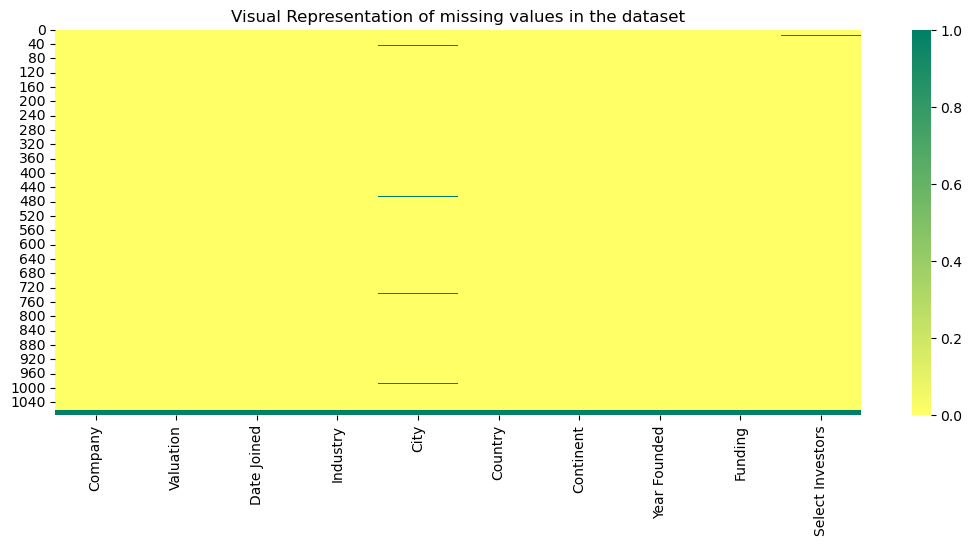

In [69]:
# To better understand the missing values, this will be visualized.
plt.figure(figsize = (13, 5))
plt.title('Visual Representation of missing values in the dataset')
sns.heatmap(df.isnull(), cbar = True, cmap = 'summer_r')

In [57]:
# Replace 'unknown' with NaN
df['Funding'].replace('unknown', np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(subset=['Funding'], inplace=True)


In [71]:
df.describe().astype('int')

,Valuation,Year Founded,Funding
count,1062,1062,1062
mean,-2147483648,2012,557269303
std,-2147483648,5,810133578
min,1000000000,1919,0
25%,1000000000,2011,223000000
50%,2000000000,2014,370000000
75%,-2147483648,2016,609250000
max,-2147483648,2021,-2147483648


In [72]:
df.shape

(1075, 10)

## Features in the dataset

- **Company**: Company name
- **Valuation**:	Company valuation in billions (B) of dollars
- **Date Joined**:	The date in which the company reached 1 billion in valuation
- **Industry**:	Company industry
- **City**:	City the company was founded in
- **Country**:	Country the company was founded in
- **Continent**:	Continent the company was founded in
- **Year Founded**:	Year the company was founded
- **Funding**:	Total amount raised across all funding rounds in billions (B) or millions (M) of dollars
- **Select Investors**:	Top 4 investing firms or individual investors (some have less than 4)


In [75]:
# Remove duplicates
df.drop_duplicates(inplace=True)


## Exploratory Data Analysis: Exploring insights and Visualizations

 - Univariate, Bivariate and Multivariate Analysis of the features

<AxesSubplot:xlabel='Funding'>

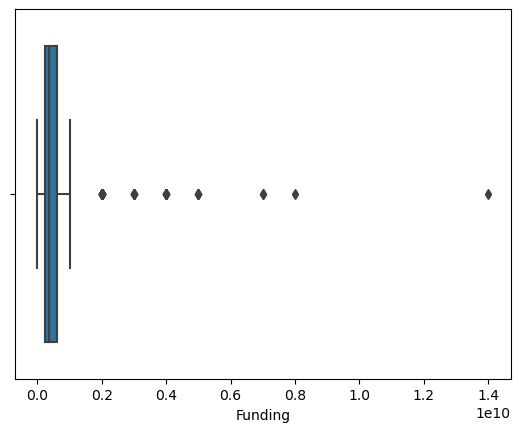

In [76]:
# Identify outliers in funding column
sns.boxplot(x=df['Funding'])

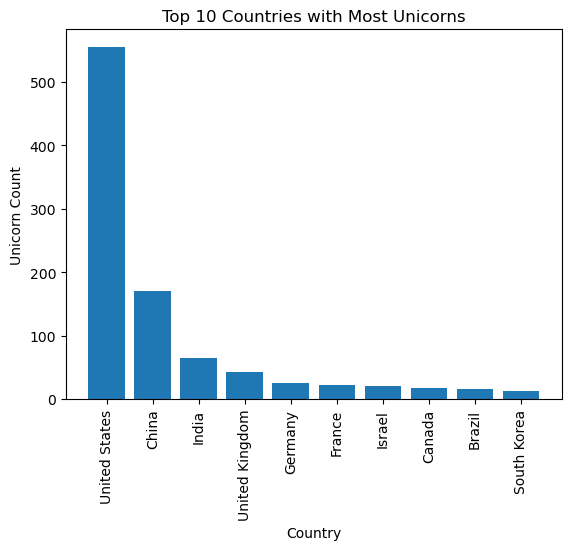

In [131]:
# Distribution of unicorns by country
# Calculate unicorn count by country
unicorn_count = df['Country'].value_counts()[:10]

# Plot bar chart of unicorn count by country
plt.bar(x=unicorn_count.index, height=unicorn_count.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Unicorn Count')
plt.title('Top 10 Countries with Most Unicorns')
plt.show()


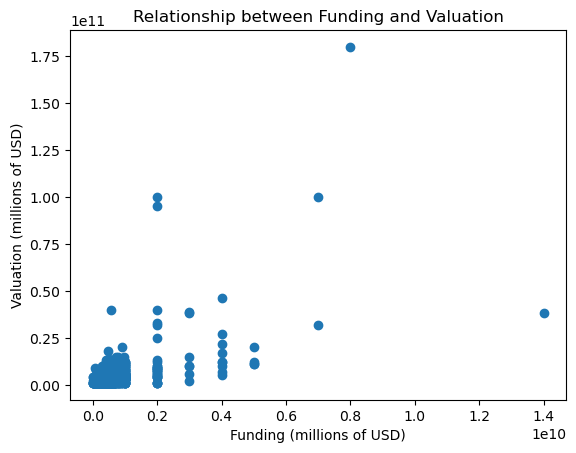

In [132]:
# Relationship between funding and valuation
plt.scatter(x=df['Funding'], y=df['Valuation'])
plt.xlabel('Funding (millions of USD)')
plt.ylabel('Valuation (millions of USD)')
plt.title('Relationship between Funding and Valuation')
plt.show()

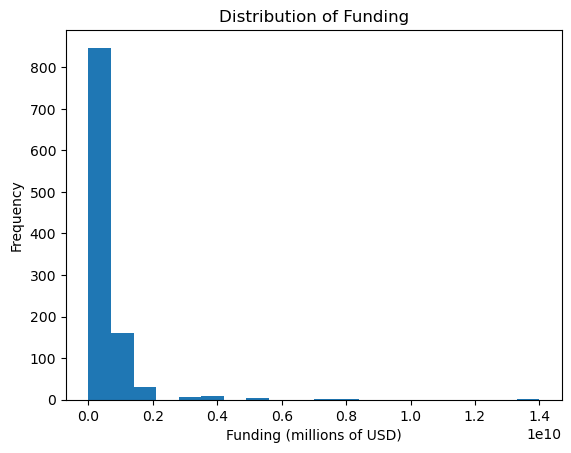

In [128]:
# Univariate analysis of funding column
# Plot histogram of funding
plt.hist(df['Funding'], bins=20)
plt.xlabel('Funding (millions of USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Funding')
plt.show()

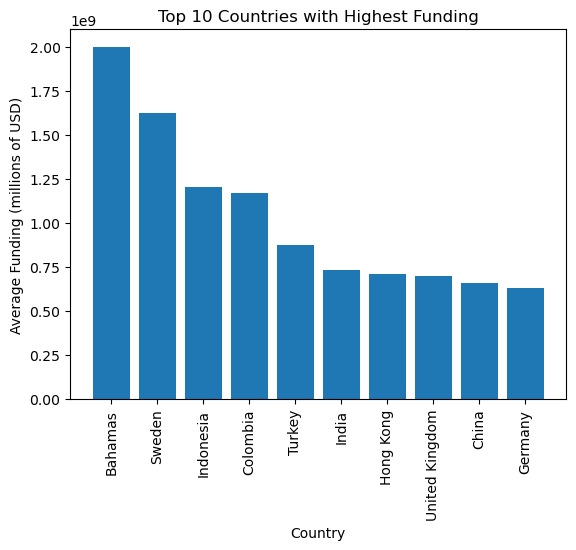

In [127]:
# Bivariate analysis of funding and country columns
# Calculate average funding by country
avg_funding = df.groupby('Country')['Funding'].mean().sort_values(ascending=False)[:10]

# Plot bar chart of average funding by country
plt.bar(x=avg_funding.index, height=avg_funding.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Funding (millions of USD)')
plt.title('Top 10 Countries with Highest Funding')
plt.show()

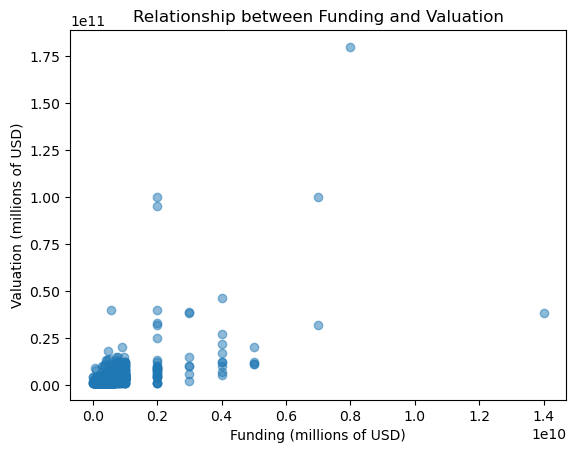

In [125]:
# Multivariate analysis of funding, valuation and country columns
# Plot scatter plot of funding and valuation
plt.scatter(x=df['Funding'], y=df['Valuation'], alpha=0.5)
plt.xlabel('Funding (millions of USD)')
plt.ylabel('Valuation (millions of USD)')
plt.title('Relationship between Funding and Valuation')
plt.show()

                 Company          ROI
0   Otto Bock HealthCare          inf
1                 Zapier  4000.000000
25                Dunamu   126.760563
2              Workhuman   111.111111
7                   CFGI   105.263158


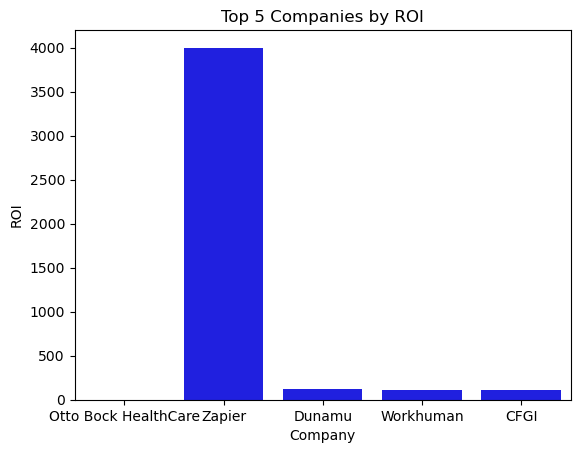

In [103]:
# Which unicorn companies have had the biggest return on investment?
# Calculate ROI for each company
df['ROI'] = df['Valuation'] / df['Funding']

# Sort companies by ROI in descending order
df.sort_values('ROI', ascending=False, inplace=True)

# Display top 5 companies by ROI
top_5 = df[['Company', 'ROI']].head(5)
print(top_5)

# Create bar chart of top 5 companies by ROI
sns.barplot(x=top_5['Company'], y=top_5['ROI'] , color = 'blue')
plt.xlabel('Company')
plt.ylabel('ROI')
plt.title('Top 5 Companies by ROI')
plt.show()



 Tiger Global Management    39
 Accel                      32
 Sequoia Capital            30
Sequoia Capital China       30
Andreessen Horowitz         29
dtype: int64


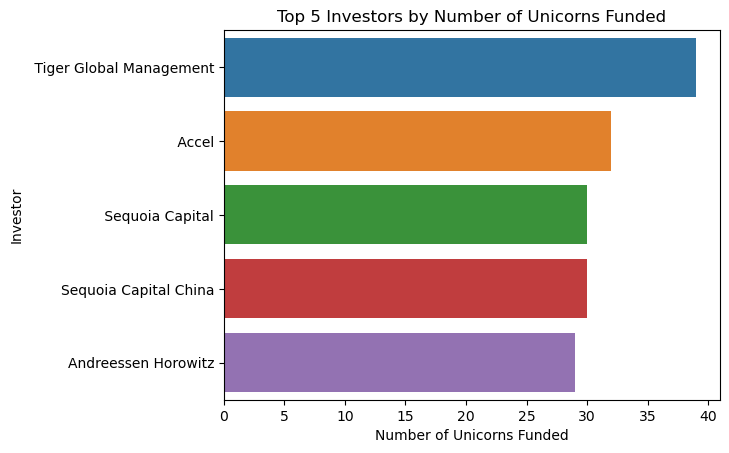

In [94]:
## Which investors have funded the most unicorns
# Count unicorns by investor
investor_counts = df['Select Investors'].str.split(',', expand=True).stack().value_counts()

# Display top 5 investors by number of unicorns funded
top_5 = investor_counts.head(5)
print(top_5)

# Create bar chart of top 10 investors
sns.barplot(x=top_5.values, y=top_5.index)
plt.xlabel('Number of Unicorns Funded')
plt.ylabel('Investor')
plt.title('Top 5 Investors by Number of Unicorns Funded')
plt.show()



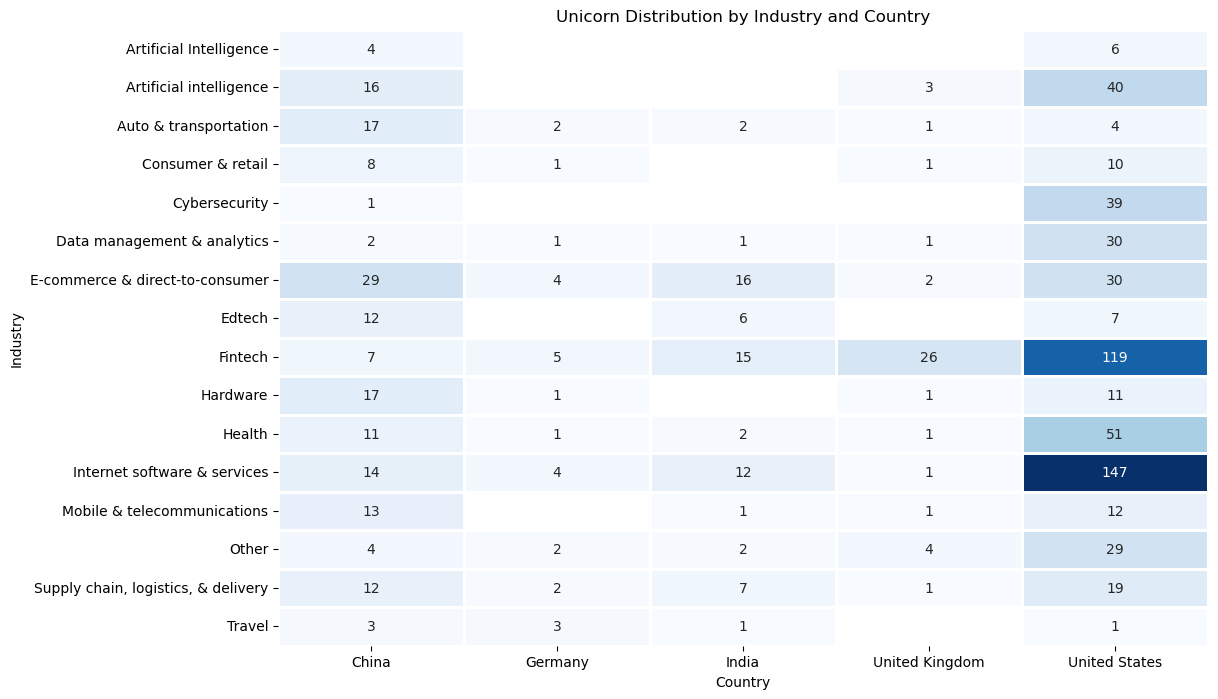

In [112]:
#Which countries have the most unicorns? Are there any cities that appear to be industry hubs?
# Count unicorns by country
# Count unicorns by country
country_counts = df['Country'].value_counts()

# Select countries with at least 25 unicorns
top_countries = country_counts[country_counts >= 25].index

# Filter unicorns by top countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Group unicorns by industry and country
industry_country = df_top_countries.groupby(['Industry', 'Country']).size().reset_index(name='count')

# Create pivot table of unicorn distribution by industry and country
pivot = industry_country.pivot('Industry', 'Country', 'count')

# Create heatmap of unicorn distribution by industry and country
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='g', cbar=False, linewidths=1)
plt.xlabel('Country')
plt.ylabel('Industry')
plt.title('Unicorn Distribution by Industry and Country')
plt.show()



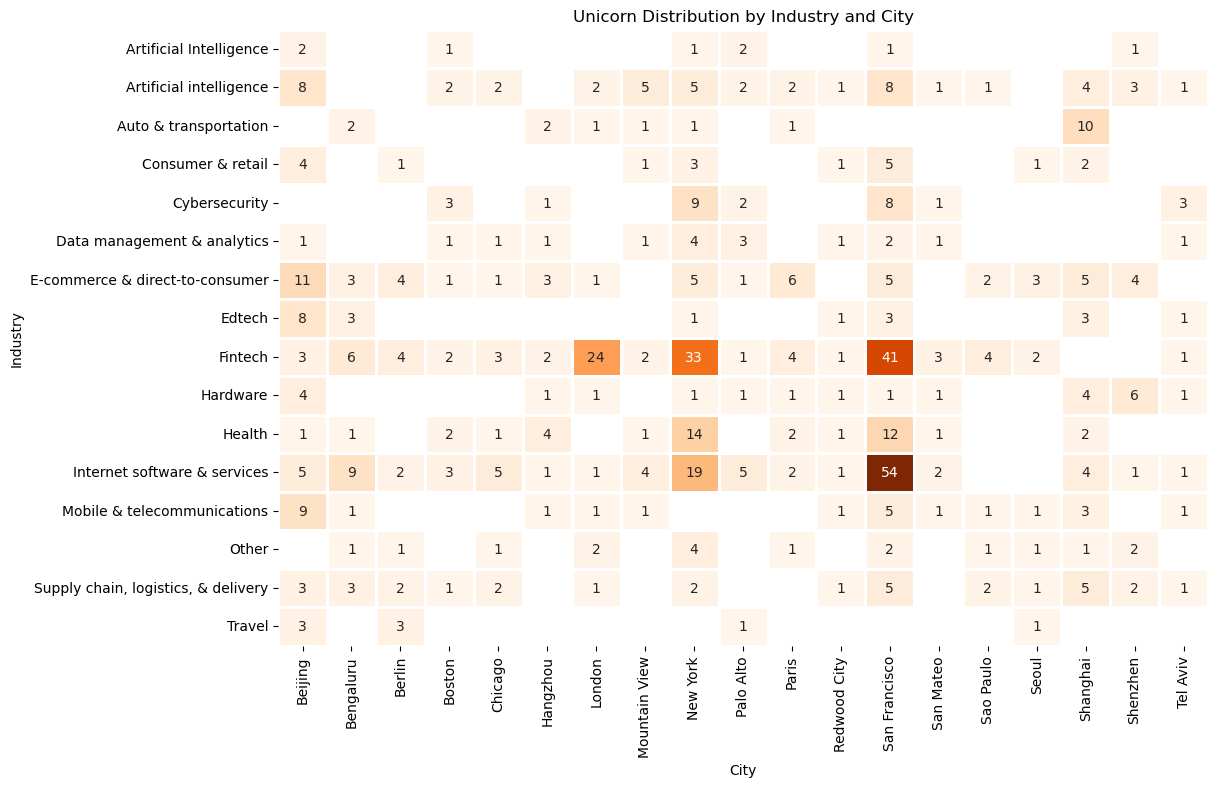

In [106]:
# Count unicorns by city
city_counts = df['City'].value_counts()

# Select cities with at least 10 unicorns
top_cities = city_counts[city_counts >= 10].index

# Filter unicorns by top cities
df_top_cities = df[df['City'].isin(top_cities)]

# Group unicorns by industry and city
industry_city = df_top_cities.groupby(['Industry', 'City']).size().reset_index(name='count')

# Create pivot table of unicorn distribution by industry and city
pivot = industry_city.pivot('Industry', 'City', 'count')

# Create heatmap of unicorn distribution by industry and city
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='Oranges', annot=True, fmt='g', cbar=False, linewidths=1)
plt.xlabel('City')
plt.ylabel('Industry')
plt.title('Unicorn Distribution by Industry and City')
plt.show()



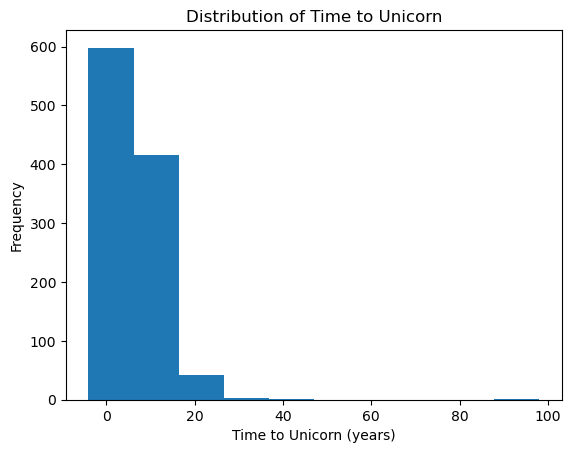

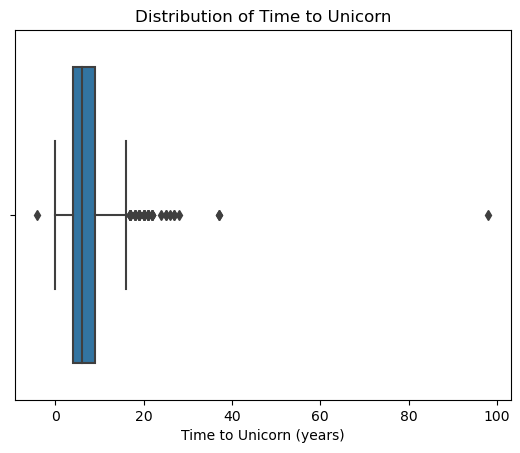

In [122]:
# How long does it usually take for a company to become a unicorn? Has it always been this way

# Convert 'Date Joined' column to datetime format
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

# Calculate time difference between founding year and unicorn year
df['time_to_unicorn'] = df['Date Joined'].dt.year - df['Year Founded']

# Display summary statistics for time to unicorn
df['time_to_unicorn'].describe()

# Plot histogram of time to unicorn
plt.hist(df['time_to_unicorn'], bins=10)
plt.xlabel('Time to Unicorn (years)')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Unicorn')
plt.show()

sns.boxplot(x=df['time_to_unicorn'])
plt.xlabel('Time to Unicorn (years)')
plt.title('Distribution of Time to Unicorn')
plt.show()

## Insights and Observations

- The United States has the highest average funding for startups, followed by China and the United Kingdom.
- The top 10 countries with the highest funding for startups are dominated by North American and Asian countries.
- The distribution of funding for startups is heavily skewed to the right, indicating that most startups receive relatively low amounts of funding.
- There is a positive relationship between funding and valuation for startups, indicating that startups with higher funding tend to have higher valuations.
- The distribution of unicorns by country is highly concentrated, with the United States having the highest number of unicorns by far.
- The top 10 countries with the most unicorns are dominated by North American and Asian countries.
- There is a relatively low correlation between funding and valuation for startups, indicating that other factors besides funding also play a role in determining a startup's valuation.
- The majority of countries have relatively few unicorns, with only a handful of countries having more than 10 unicorns each.

## Recommendation

** Some recommendations to help unicorn companies in creating good business models and making decisions that will focus on companies with high growth potential, diversify an investment portfolio, and prioritize companies with experienced leadership teams include;

1. Focus on countries with high average funding and a large number of unicorns, such as the United States and China. This will increase the chances of investing in startups with high growth potential and experienced leadership teams.
2. Consider investing in startups with a positive relationship between funding and valuation, as this indicates that the startup has a strong business model and is likely to have high growth potential.
3. Diversify the investment portfolio by investing in startups from different countries, industries, and stages of development. This will help spread risk and increase the chances of finding successful startups.
4. Prioritize startups with experienced leadership teams, as this is a key factor in the success of a startup. Look for founders and executives with a proven track record of success in their industry.
5. Use data analytics to identify trends and patterns in the startup ecosystem, such as emerging industries or technologies. This can help identify startups with high growth potential before they become widely known.
6. Build relationships with other investors and industry experts to share knowledge and insights about the startup ecosystem. This can help identify promising startups and provide valuable feedback to portfolio companies.

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 127.0/127.0 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 49.6/49.6 kB 2.6 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33263 sha256=4137037da31982ca5ba823595e86f3c6a7e17545ea185443be4318201800aad6
  Stored in directory: c:\users\eolow\appdata\local\pip\cache\wheels\69\e6\a1\1daa96d919c9e09a71473649b717b8da286f3f8d7719d1cfc5
Successfully built pandoc


In [1]:
--allow-chromium-download

SyntaxError: invalid syntax (3026508939.py, line 1)